# Name - Yashika
## Data Science Task-5(OIBSIP)

In [1]:
import numpy as np
import pandas as pd


In [2]:
adver = pd.read_csv('Advertising.csv')
adver.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
adver.drop('Unnamed: 0', axis = 1, inplace = True)
adver.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# Independent features and Dependent features
X = adver[['TV', 'Radio', 'Newspaper']]
Y = adver['Sales']
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [5]:
# train test split
from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 0)
#  split the dataset into training and testing in the ratio of 80:20
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [6]:
# standardizing the dataset(input feature)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-1.34155345,  1.0355176 ,  1.65941078],
       [-1.4053143 ,  0.08249594, -1.30629738],
       [-0.08995151,  0.40243892, -0.81980897],
       [ 0.69761311, -0.18979597, -0.90868666],
       [ 0.76609699,  0.01442296,  1.28518893],
       [-0.56461564,  0.42286082, -1.01627544],
       [-1.67570755, -1.44914602, -1.36243065],
       [-1.57770476,  1.38268978,  2.77272078],
       [-0.29304164,  0.91979354,  2.29558792],
       [-0.54218127, -1.20408331,  0.19994556],
       [-0.48078193, -0.61865571,  0.07364569],
       [ 0.93258366,  0.60665785,  2.06169926],
       [ 1.2195075 , -0.14214488, -0.00587645],
       [ 0.40596624, -0.16256678, -0.3800983 ],
       [-1.24945444,  0.16418351, -0.44558712],
       [-1.04164129, -0.73437977, -0.55317591],
       [ 1.68118331,  0.33436595,  0.6115896 ],
       [ 0.25955243, -0.35997841,  0.02686796],
       [ 0.61377939, -0.07407191,  0.06896792],
       [-1.69105739,  0.32075135,  0.52738968],
       [ 1.35411375, -1.39468764,  0.602

In [8]:
X_test = scaler.transform(X_test)
X_test

#scaler.inverse_transform(X_test)   # to get the data in original form

array([[-0.96016909, -0.19660326, -0.55317591],
       [-1.18687434, -0.80245275, -0.54849813],
       [-0.7098487 , -1.57167737, -0.32396502],
       [ 1.6433991 ,  1.28738761,  0.98581145],
       [ 0.23239503, -1.06113006,  0.23736775],
       [-1.11366744, -1.20408331, -0.01990977],
       [-1.6745268 ,  1.73666925,  2.09912145],
       [ 1.05774385, -1.09516654, -1.00224213],
       [-1.49623256,  0.79726218,  1.67344409],
       [ 0.55592232, -0.00599893, -0.7449646 ],
       [ 1.30806424,  1.3146168 ,  1.14953351],
       [-0.74763291, -0.78883815, -0.19766515],
       [ 0.07181214, -1.41510953, -1.02095322],
       [ 0.44020818, -0.15575948, -0.96481994],
       [-0.87515461,  0.22544919, -0.36606498],
       [-0.35798325, -0.25786894, -0.8665867 ],
       [ 1.35883677, -0.23063975, -1.39517507],
       [-1.76898732,  1.10359057, -1.00224213],
       [-0.89522748,  1.77070574,  0.72853393],
       [ 0.74248186,  0.08249594, -0.79642011],
       [ 1.61860321,  1.33503869,  1.949

In [9]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [10]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [11]:
mse = cross_val_score(regression, X_train, Y_train, scoring = 'neg_mean_squared_error', cv = 10)
mse    # mean squared error

array([-1.71524789, -1.67158319, -1.83164463, -4.44175358, -1.22520234,
       -2.78857297, -3.57788547, -2.46388059, -4.00592555, -2.39062693])

In [12]:
np.mean(mse)

-2.611232315558323

In [13]:
# prediction 
reg_pred = regression.predict(X_test)
reg_pred

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

C:\Users\Yogesh Gahlawat\Desktop\Project\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


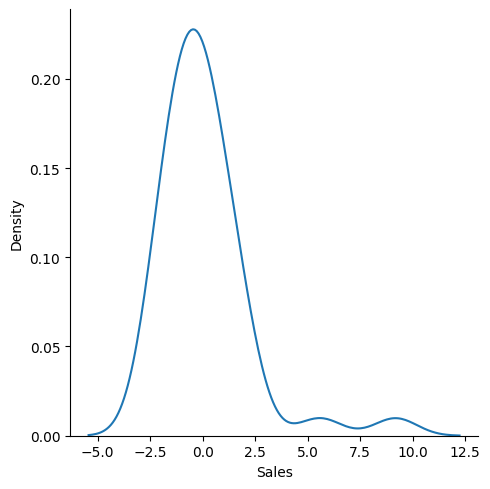

In [14]:
import seaborn as sns
sns.displot(reg_pred - Y_test, kind = 'kde')

In [15]:
from sklearn.metrics import r2_score
score = r2_score(reg_pred, Y_test)
score

0.8330284237692488